In [ ]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
# Importing dataset
from tensorflow.keras.datasets import cifar10

In [ ]:
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
# 50000 images, 32 px by 32 px, 3 color channels
xTrain.shape

(50000, 32, 32, 3)

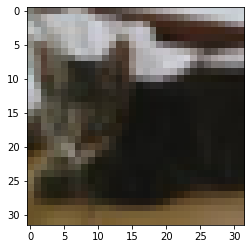

In [ ]:
# Examining a sample image from training set
plt.imshow(xTrain[9])

In [ ]:
# Scaling pixel values to be between 0 and 1
xTrain = xTrain/255
xTest = xTest/255 

In [ ]:
from tensorflow.keras.utils import to_categorical
# One hot encoding labels since this is a multiclass classification problem
y_cat_train = to_categorical(yTrain)
y_cat_test = to_categorical(yTest)

In [ ]:
# Importing TensorFlow models, layers and callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu')) 
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu')) 
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

# Softmax activation function used for multiclass classification
# 10 neurons because there are 10 classes
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Summary of the model we defined in the cell above
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f1a6410c910>>

In [ ]:
# Patience is the number of epochs to wait if no progress is made on the validation set before stopping 
earlyStop = EarlyStopping(monitor='val_loss', patience=2) 

In [ ]:
# Training the model
model.fit(xTrain, y_cat_train, epochs=15, validation_data=(xTest, y_cat_test), callbacks=[earlyStop])

Epoch 1/15
1563/1563 [==============================] - 56s 35ms/step - loss: 1.5078 - accuracy: 0.4562 - val_loss: 1.2811 - val_accuracy: 0.5408
Epoch 2/15
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1643 - accuracy: 0.5877 - val_loss: 1.0934 - val_accuracy: 0.6164
Epoch 3/15
1563/1563 [==============================] - 55s 35ms/step - loss: 1.0259 - accuracy: 0.6410 - val_loss: 1.0314 - val_accuracy: 0.6437
Epoch 4/15
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9163 - accuracy: 0.6791 - val_loss: 1.0321 - val_accuracy: 0.6383
Epoch 5/15
1563/1563 [==============================] - 54s 35ms/step - loss: 0.8257 - accuracy: 0.7111 - val_loss: 0.9661 - val_accuracy: 0.6691
Epoch 6/15
1563/1563 [==============================] - 54s 35ms/step - loss: 0.7498 - accuracy: 0.7381 - val_loss: 0.9509 - val_accuracy: 0.6798
Epoch 7/15
1563/1563 [==============================] - 54s 35ms/step - loss: 0.6786 - accuracy: 0.7642 - val_loss: 0.9861 -

In [ ]:
# Creating a dataframe from model.history.history to view and plot metrics more easily
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.507831,0.45618,1.281102,0.5408
1,1.164255,0.58772,1.093417,0.6164
2,1.025950,0.64102,1.031408,0.6437
3,0.916268,0.67908,1.032140,0.6383
4,0.825678,0.71114,0.966123,0.6691
5,0.749809,0.73810,0.950876,0.6798
6,0.678606,0.76424,0.986077,0.6736
7,0.617808,0.78394,0.990650,0.6763


In [ ]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

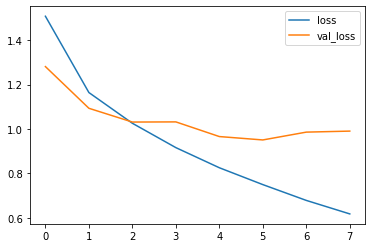

In [ ]:
metrics[['loss', 'val_loss']].plot()

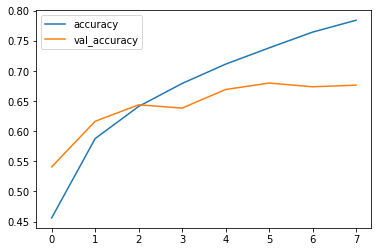

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

In [ ]:
model.evaluate(xTest, y_cat_test, verbose=0)

[0.9906499981880188, 0.6762999892234802]

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Predicting on test set
predict = model.predict(xTest) 
classes = np.argmax(predict,axis=-1)
classes

array([3, 1, 8, ..., 5, 4, 7])

In [ ]:
# Classification Report
print(classification_report(yTest, classes))

              precision    recall  f1-score   support

           0       0.81      0.61      0.70      1000
           1       0.84      0.77      0.80      1000
           2       0.61      0.56      0.58      1000
           3       0.49      0.50      0.49      1000
           4       0.60      0.68      0.64      1000
           5       0.53      0.65      0.58      1000
           6       0.81      0.68      0.74      1000
           7       0.74      0.70      0.72      1000
           8       0.73      0.82      0.77      1000
           9       0.71      0.81      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [ ]:
# Overall accuracy of 68%. A random guess would be 10% accurate. This model is ~6.8 times more accurate than a random guess. 